# Phenomenlogical hydrodynamic eequations with constant coefficients

In the comoving frame, the phenomenlogical hydrodynamic equations can be written as
$$
D\ddot{m} = f(m)\dot{m} - \frac{dH}{dm},
$$
where
$$
H(m) = -(\phi_g -\rho_g)\frac{m^2}{2} + \frac{v_0}{3c_0} m^3 + \frac{a_4}{4} m^4 + \frac{a_5}{5} m^5 - \frac{a_6}{6}m^6,
$$
and 
$$
f(m) = c_0 - \frac{\lambda v_0}{c_0} - \xi m.
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def potential(m, c0, rho_g, phi_g, v0, a4, a5, a6):
    return -(phi_g - rho_g)/2 * m ** 2 + v0 / (3 * c0) * m**3 + a4/4 * m**4 + a5/5 * m**5 - a6/6 * m**6

def friction(m, c0, lambdaa, v0, xi):
    return c0 - lambdaa * v0 / c0 - xi * m

def get_coeff(B, C, D, E, a6, v0, phi_g):
    a5 = -B * a6
    a4 = -C * a6
    c0 = - v0 /(a6 * D)
    rho_g = phi_g - a6 * E
    return a4, a5, c0, rho_g
    


The roots for $H'(m)=0$ is $m=0$ and the roots for the quartic equation
$$
-a_6 m^4 + a_5 m^3 + a_4 m^2 + \frac{v_0}{c_0} m - (\phi_g -\rho_g) = 0.
$$
Here, $a_6 >0$. The above equation can be simplified as
$$
m^4 + B m^3 + C m^2 + D m + E = 0,
$$
where 
$$
\begin{align*}
B = -\frac{a_5}{a_6}, C=-\frac{a_4}{a_6}, D=-\frac{v_0}{a_6c_0}<0, E=\frac{(\phi_g-\rho_g)}{a_6}>0.
\end{align*}
$$

The solution can be found by intorducing
$$
\begin{align*}
a &= - \frac{3B^2}{8} + C, \\
b &= \frac{B^3}{8} - \frac{BC}{2} + D, \\
c &= -\frac{3B^4}{256} + \frac{CB^2}{16} - \frac{BD}{4} + E.
\end{align*}
$$

In [3]:
def get_a_b_c(B, C, D, E):
    a = -3/8 * B**2 + C
    b = B**3 / 8 - B*C/2 +D
    c = -3/256 * B**4 + C * B**2 / 16 - B*D/4 + E
    return a, b, c

def get_C(B, D):
    return B**2 / 4 + 2 * D / B


def get_BCDE(c0, rho_g, phi_g, v0, a4, a5, a6):
    B = -a5 / a6
    C = -a4 / a6
    D = -v0 / (a6 * c0)
    E = (phi_g - rho_g) / a6
    return B, C, D, E

if $b=0$, i.e., $C=\frac{B^2}{4} + \frac{2D}{B}$, then
$$
x=-\frac{B}{4}\pm \sqrt{
    \frac{-a\pm\sqrt{a^2-4c}}{2},
}
$$
where
$$
\begin{align*}
a&=-\frac{B^2}{8} + \frac{2D}{B}, \\
c&=\frac{B^4}{256} - \frac{BD}{8} + E.
\end{align*}
$$

In [4]:
def get_root(a, b, c, B):
    if b == 0.:
        Delta = a**2 - 4 * c
        print(Delta)
        Delta_p = (-a + np.sqrt(Delta))/2
        Delta_m = (-a - np.sqrt(Delta))/2

        x_pp = -B/4 + np.sqrt(Delta_p)
        x_pm = -B/4 + np.sqrt(Delta_m)
        x_mp = -B/4 - np.sqrt(Delta_p)
        x_mm = -B/4 - np.sqrt(Delta_m)

    return [x_pp, x_pm, x_mp, x_mm]

To have four real roots, we need $a^2 > 4c$, $a<0$, $B<0$ and $B^2> 8 (-a+\sqrt{a^2-4c})$.
$$
a^2 - 4c = \frac{4D^2}{B^2} - 4E.
$$

$a^2>4c$ requires
$$
D^2 > B^2 E.
$$
Given that $D< 0$, $a<0$ and $B<0$ requires 
$$
0 > D> \frac{B^3}{16}.
$$
Lastly, $B^2>8(-a + \sqrt{a^2 - 4c})$ is equivalent to
$$
\frac{2D}{B} > \sqrt{\frac{4D^2}{B^2}-4E},
$$
which is always true given that $B, D < 0$ and $E>0$. 
In summary, for $B<0$, other parameters should satisfy
$$
\begin{align*}
C&=\frac{B^2}{4} + \frac{2D}{B}, \\
0&> D > \frac{B^3}{16}, \\
0& <E < \frac{D^2}{B^2}.
\end{align*}
$$

In [5]:
def find_four_real_roots(B, C, D, E):
    a, b, c = get_a_b_c(B, C, D, E)
    if b == 0.:
        Delta1 = a**2 - 4 * C
        if Delta1 < 0:
            return None
        else:
            sqrt_Delta1 = np.sqrt(Delta1)
            Delta2_p = (-a + sqrt_Delta1)/2
            Delta2_m = (-a - sqrt_Delta1)/2
            if Delta2_m < 0:
                return None
            else:
                sqrt_Delta2_p = np.sqrt(Delta2_p)
                sqrt_Delta2_m = np.sqrt(Delta2_m)
            x_mm = -B / 4 - sqrt_Delta2_m
            if x_mm < 0:
                return None
            else:
                x_pm = -B/4 + sqrt_Delta2_m
                x_mp = -B/4 - sqrt_Delta2_p
                x_pp = -B/4 + sqrt_Delta2_p
    else:
        P = -a**2 / 12 - c
        Q = -a**3 / 108 + a * c / 3 - b**2 /8
        Delta_R = Q**2 / 4 + P**3 / 27
        if Delta_R < 0:
            return None
        else:
            R = -Q/2 + np.sqrt(Delta_R)
            U = np.cbrt(R)
            y = -5 / 6 * a
            if U == 0.:
                y -= np.cbrt(Q)
            else:
                y += (U - P/(3 * U))
            Delta_W = a + 2 * y
            if Delta_W < 0:
                return None
            else:
                W = np.sqrt(Delta_W)
                Delta_p = -(3 * a + 2 * y + 2 * b / W)
                Delta_m = -(3 * a + 2 * y - 2 * b / W)
                if Delta_p < 0 or Delta_m < 0:
                    return None
                else:
                    x_mm = -B/4 + 0.5 * (-W - np.sqrt(Delta_m))
                    x_pm = -B/4 + 0.5 * ( W - np.sqrt(Delta_p))
                    if x_mm < 0 or x_pm < 0:
                        return None
                    else:
                        x_mp = -B/4 + 0.5 * (-W + np.sqrt(Delta_m))
                        x_pp = -B/4 + 0.5 * ( W + np.sqrt(Delta_p))
    return np.array([x_mm, x_mp, x_pm, x_pp])
        

In [6]:
import fqs

B = -2
D = -1/4
E = 1/100
C = get_C(B, D)
a, b, c = get_a_b_c(B, C, D, E)

# print(a, b, c)

a **2 - 4 * c

roots = get_root(a, b, c, B)
print(roots)

# for x in roots:
#     plt.axvline(x, linestyle=':', color="tab:green")


# m_arr = np.linspace(-0.5, 1.5)
# f = m_arr **4 + B * m_arr **3 + C * m_arr **2 + D * m_arr  + E


# plt.plot(m_arr, f)
# plt.axhline(0, linestyle="dashed")
# plt.show()
# plt.close()


0.0225
[0.9472135954999579, 0.7236067977499789, 0.05278640450004207, 0.27639320225002106]


-1.25 2 4.0 0.99


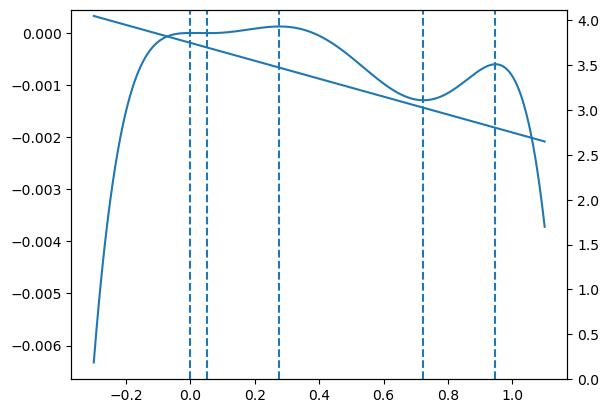

In [7]:
phi_g = v0  = lambdaa = 1
xi = 1
a6 = 1
a4, a5, c0, rho_g = get_coeff(B, C, D, E, a6, v0, phi_g)

print(a4, a5, c0, rho_g)

m_arr = np.linspace(-0.3, 1.1, 1000)

H = potential(m_arr, c0, rho_g, phi_g, v0, a4, a5, a6)

f = friction(m_arr, c0, lambdaa, v0, xi)

plt.plot(m_arr, H)
ax_right = plt.gca().twinx()
ax_right.plot(m_arr, f)
roots.append(0)
for x in roots:
    plt.axvline(x, linestyle="dashed")
plt.ylim(-2e-3)
plt.show()
plt.close()



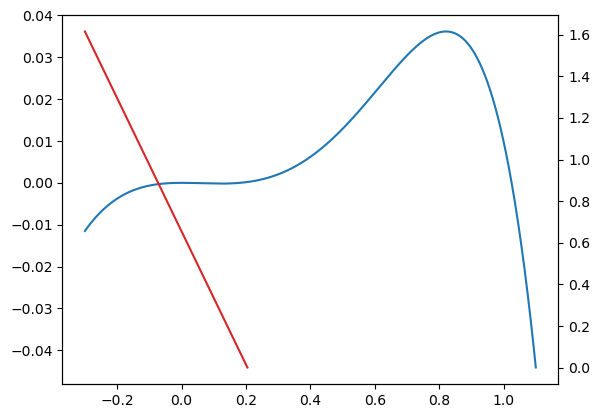

In [15]:
m_arr = np.linspace(-0.3, 1.1, 1000)
xi = 3.2

c0 = 1.38
rho_g = 0.92

a4 = -0.5
a5 = 0.5
a6 = 1
H = potential(m_arr, c0, rho_g, phi_g, v0, a4, a5, a6)

f = friction(m_arr, c0, lambdaa, v0, xi)
mask = f >0

plt.plot(m_arr, H)
ax = plt.gca()
ax_right = ax.twinx()
ax_right.plot(m_arr[mask], f[mask], c="tab:red")
# roots.append(0)
# for x in roots:
#     plt.axvline(x, linestyle="dashed")
# ax.set_ylim(-2e-3)
plt.show()
plt.close()